In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import collections
import nltk
from pyecharts.charts import *
from pyecharts.commons.utils import JsCode
from pyecharts import options as opts
from pyecharts.options.global_options import ThemeType
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
plt.rcParams['axes.unicode_minus'] = False	#显示负号

In [2]:
df = pd.read_csv('数据/clean_data.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0


In [3]:
df = pd.read_csv('数据/model_data.csv')

In [3]:
#特征合并ingredients,diet,flavor_profile,course
df['feature_merge']=df['ingredients']+','+df['diet']+','+df['flavor_profile']+','+df['course']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,feature_merge
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0,"Maida flour, yogurt, oil, sugar,vegetarian,swe..."
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0,"Gram flour, ghee, sugar,vegetarian,sweet,dessert"
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0,"Carrots, milk, sugar, ghee, cashews, raisins,v..."
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0,"Milk powder, plain flour, baking powder, ghee,..."


In [5]:
ingredientsList=[]
for i in range(0,len(df)):
    ingredientsList.append(df['feature_merge'][i].split(","))
flat_list = []
for sublist in ingredientsList:
    for item in sublist:
        str1 = item.lstrip()
        str1 = str1.lower()
        str2 = str1.rstrip()
        flat_list.append(str2) 

In [5]:
cos_matrix = np.load("D:/泰迪培训/python数据分析/印度美食分析与相似性研究/相似美食推荐系统/cosine_similarity_matrix.npy")

In [6]:
words = np.array(list(set(flat_list)))

In [7]:
def gen_ingredients_vector(ingredients):
    ingredients_vec = np.zeros(words.shape)
    flat_list = [sublist.lower() for sublist in ingredients.split(",")]
    s = [a.lstrip() for a in flat_list]
    s = set([m.rstrip() for m in s])
    for ingredient in s:
        idx = np.where(words == ingredient)
        ingredients_vec[idx] = 1
    return ingredients_vec.tolist()
df["ingredients_vec"] = df["feature_merge"].map(gen_ingredients_vector)

In [4]:
df[['name','ingredients','diet','flavor_profile','course','feature_merge','ingredients_vec']].head()

,name,ingredients,diet,flavor_profile,course,feature_merge,ingredients_vec
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,"Maida flour, yogurt, oil, sugar,vegetarian,swe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,"Gram flour, ghee, sugar,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,"Carrots, milk, sugar, ghee, cashews, raisins,v...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,"Flour, ghee, kewra, milk, clarified butter, su...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,"Milk powder, plain flour, baking powder, ghee,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [117]:
df.to_csv('model_data.csv')

In [8]:
# 检验,第一个美食有4种食材,第二个有3种,第三个有6种,还有其他三个特征,检验结果无误
sum(df["ingredients_vec"][0]),sum(df["ingredients_vec"][1]),sum(df["ingredients_vec"][2])

(7.0, 6.0, 9.0)

In [9]:
ingredients_vecs = []
for i in range(len(df)):
    ingredients_vecs.append(df["ingredients_vec"][i])
ingredients_vecs = np.array(ingredients_vecs)

In [67]:
ingredients_vecs.shape

(255, 365)

Text(0.5, 1.0, 'cosine_similarity of ingredients_vectors')

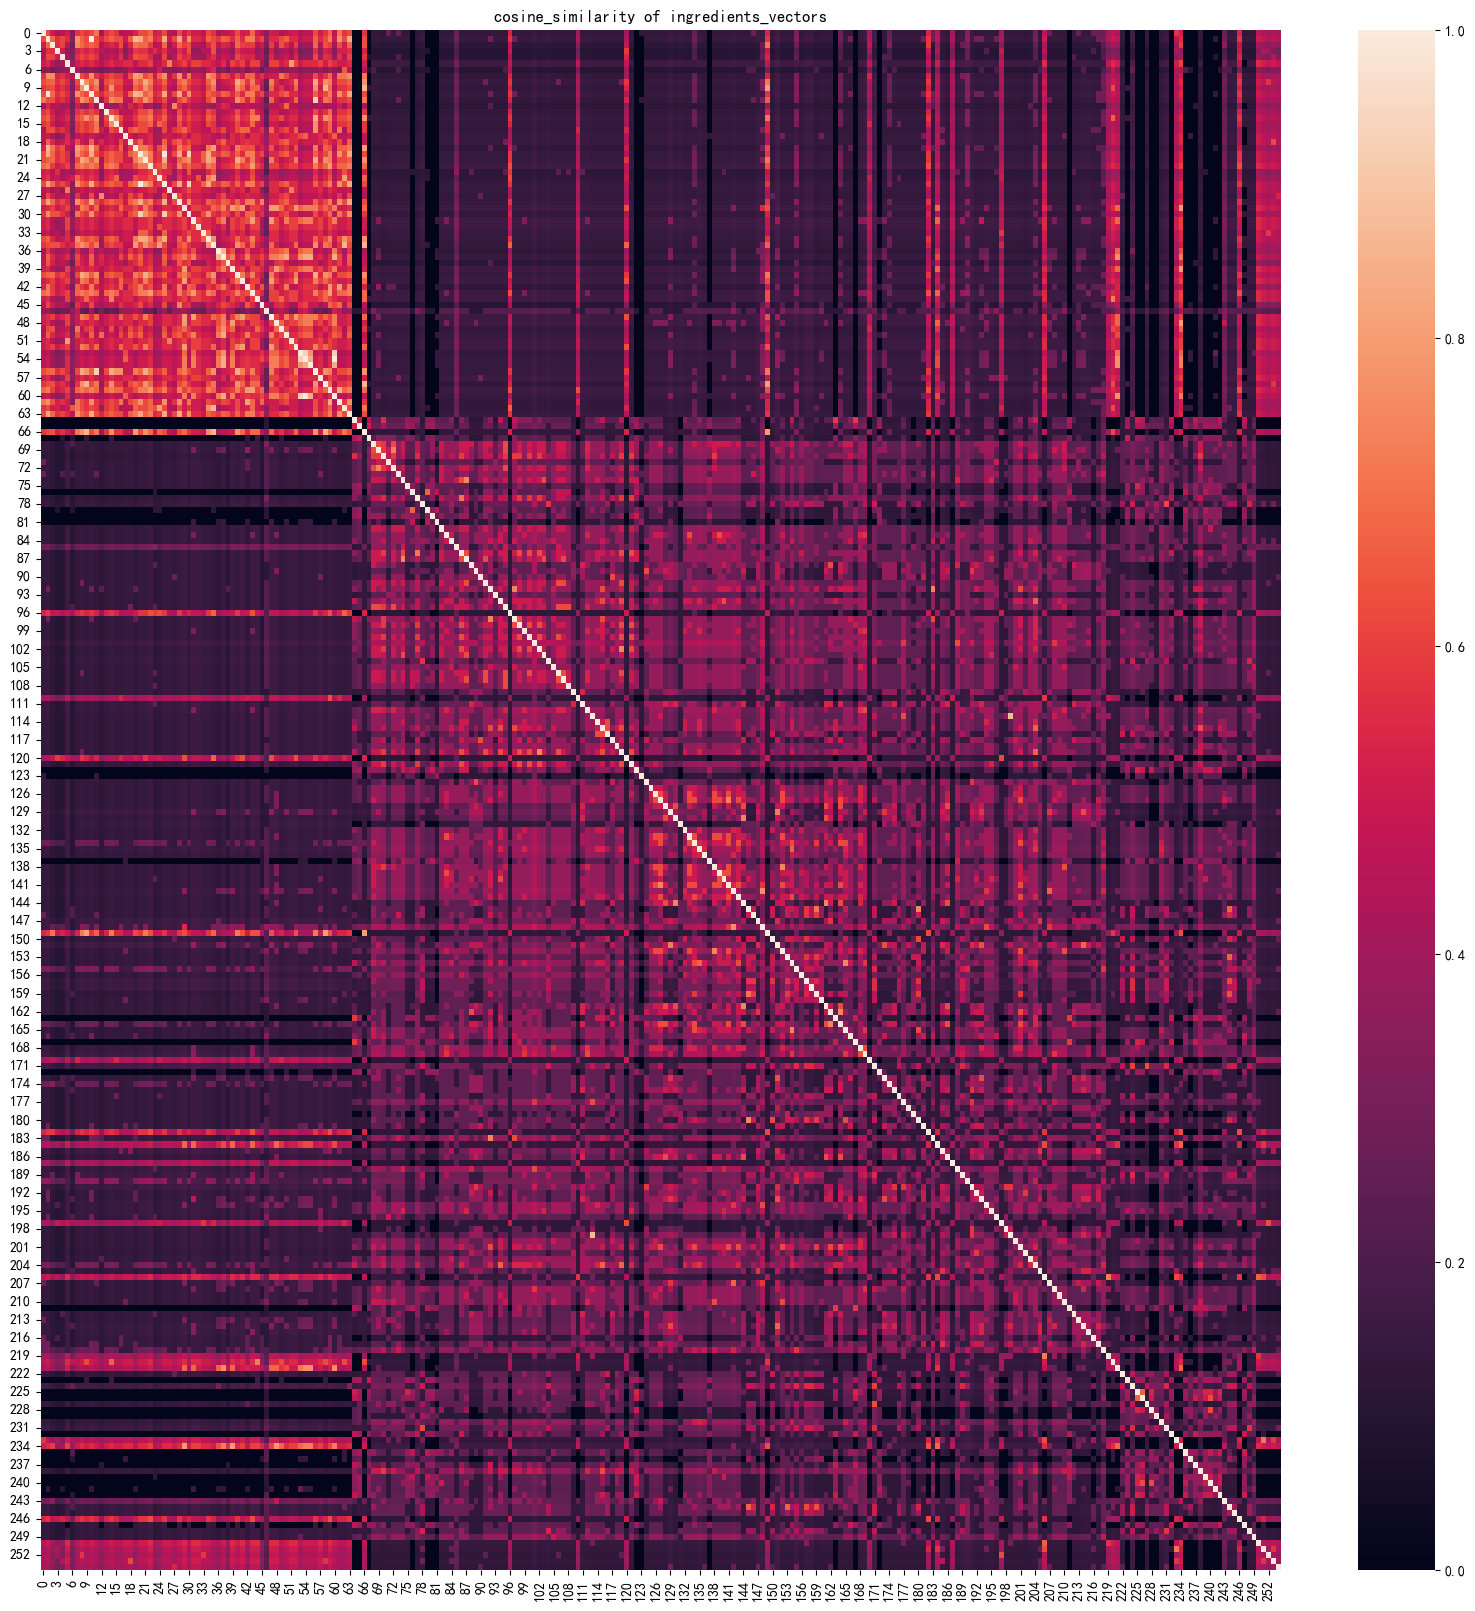

In [10]:
cos_matrix = cosine_similarity(ingredients_vecs, ingredients_vecs)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(cos_matrix)
ax.set_title("cosine_similarity of ingredients_vectors")

In [11]:
cos_matrix

array([[1.        , 0.6172134 , 0.50395263, ..., 0.40089186, 0.42857143,
        0.40089186],
       [0.6172134 , 1.        , 0.68041382, ..., 0.4330127 , 0.46291005,
        0.4330127 ],
       [0.50395263, 0.68041382, 1.        , ..., 0.35355339, 0.37796447,
        0.35355339],
       ...,
       [0.40089186, 0.4330127 , 0.35355339, ..., 1.        , 0.40089186,
        0.375     ],
       [0.42857143, 0.46291005, 0.37796447, ..., 0.40089186, 1.        ,
        0.40089186],
       [0.40089186, 0.4330127 , 0.35355339, ..., 0.375     , 0.40089186,
        1.        ]])

In [149]:
np.save("cosine_similarity_matrix.npy", cos_matrix)

In [19]:
food = 'Ledikeni'
target_index = df[df["name"] == food].index[0]
cos_matrix[target_index][target_index] = 0
print('为',food,'推荐相似美食','索引值为:',target_index)
target_vector = cos_matrix[target_index]
top_indices = target_vector.argsort()[-5:][::-1]
top_indices1 = target_vector.argsort()[50:51][::-1]
top_indices
similar_foods_with_similarity = []
for i,index in enumerate(top_indices):
    similarity_value = cos_matrix[target_index][index]
    print('NO.',i+1,'：','索引值:',index,'名称',df.loc[index]["name"],"    推荐系数:",similarity_value)
for i,index in enumerate(top_indices1):
    similarity_value = cos_matrix[target_index][index]
    print('索引值: ',index,'名称',df.loc[index]["name"],"    推荐系数:",similarity_value)

为 Ledikeni 推荐相似美食 索引值为: 25
NO. 1 ： 索引值: 20 名称 Chhena jalebi     推荐系数: 1.0000000000000002
NO. 2 ： 索引值: 30 名称 Pantua     推荐系数: 0.9258200997725514
NO. 3 ： 索引值: 28 名称 Mihidana     推荐系数: 0.8333333333333336
NO. 4 ： 索引值: 1 名称 Boondi     推荐系数: 0.8333333333333336
NO. 5 ： 索引值: 63 名称 Sutar feni     推荐系数: 0.8333333333333336
索引值:  181 名称 Dhokla     推荐系数: 0.14433756729740646


In [21]:
df[['name','ingredients','diet','flavor_profile','course']].iloc[[25,20,30,181]]

,name,ingredients,diet,flavor_profile,course
25,Ledikeni,"Chhena, sugar, ghee",vegetarian,sweet,dessert
20,Chhena jalebi,"Chhena, sugar, ghee",vegetarian,sweet,dessert
30,Pantua,"Chhena, sugar, ghee, flour",vegetarian,sweet,dessert
181,Dhokla,"Rava, coconut, gram flour, mustard, sesame",vegetarian,spicy,snack


In [144]:
def recommend_similar_food(food):
    target_index = df[df["name"] == food].index[0]
    cos_matrix[target_index][target_index] = 0      #设与自身余弦相似值为0,避免干扰
    print('为',food,'推荐相似美食','索引值为:',target_index)
    target_vector = cos_matrix[target_index]
    top_indices = target_vector.argsort()[-10:][::-1]
    similar_foods_with_similarity = []
    for i,index in enumerate(top_indices):
        similarity_value = cos_matrix[target_index][index]
        print('NO.',i+1,'：','索引值:',index,'名称',df.loc[index]["name"],"    推荐系数:",similarity_value)
        # similar_foods_with_similarity.append((df.loc[index]["name"], similarity_value))

In [145]:
recommend_similar_food('Ledikeni')

为 Ledikeni 推荐相似美食 索引值为: 25
NO. 1 ： 索引值: 20 名称 Chhena jalebi     推荐系数: 1.0000000000000002
NO. 2 ： 索引值: 30 名称 Pantua     推荐系数: 0.9258200997725515
NO. 3 ： 索引值: 28 名称 Mihidana     推荐系数: 0.8333333333333336
NO. 4 ： 索引值: 1 名称 Boondi     推荐系数: 0.8333333333333336
NO. 5 ： 索引值: 63 名称 Sutar feni     推荐系数: 0.8333333333333336
NO. 6 ： 索引值: 10 名称 Laddu     推荐系数: 0.8333333333333336
NO. 7 ： 索引值: 21 名称 Chhena kheeri     推荐系数: 0.8333333333333335
NO. 8 ： 索引值: 34 名称 Rasgulla     推荐系数: 0.8333333333333335
NO. 9 ： 索引值: 61 名称 Shankarpali     推荐系数: 0.7715167498104596
NO. 10 ： 索引值: 7 名称 Kaju katli     推荐系数: 0.7715167498104596


In [146]:
df.iloc[[25,20,30,28,1,63,10,21,34,61,7]]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,feature_merge,ingredients_vec
25,Ledikeni,"Chhena, sugar, ghee",vegetarian,45.0,45.0,sweet,dessert,West Bengal,East,90.0,"Chhena, sugar, ghee,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20,Chhena jalebi,"Chhena, sugar, ghee",vegetarian,10.0,50.0,sweet,dessert,Odisha,East,60.0,"Chhena, sugar, ghee,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
30,Pantua,"Chhena, sugar, ghee, flour",vegetarian,45.0,45.0,sweet,dessert,West Bengal,East,90.0,"Chhena, sugar, ghee, flour,vegetarian,sweet,de...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28,Mihidana,"Besan flour, sugar, ghee",vegetarian,15.0,30.0,sweet,dessert,West Bengal,East,45.0,"Besan flour, sugar, ghee,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0,"Gram flour, ghee, sugar,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
63,Sutar feni,"Maida, sugar, ghee",vegetarian,15.0,55.0,sweet,dessert,Maharashtra,West,70.0,"Maida, sugar, ghee,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10.0,40.0,sweet,dessert,Other state,Other region,50.0,"Gram flour, ghee, sugar,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,NaN,60.0,sweet,dessert,Odisha,East,NaN,"Chhena, sugar, milk,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34,Rasgulla,"Chhena, sugar, cardamom",vegetarian,10.0,90.0,sweet,dessert,West Bengal,East,100.0,"Chhena, sugar, cardamom,vegetarian,sweet,dessert","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
61,Shankarpali,"Sugar, ghee, maida flour, semolina",vegetarian,10.0,35.0,sweet,dessert,Maharashtra,West,45.0,"Sugar, ghee, maida flour, semolina,vegetarian,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [74]:
df.iloc[[30,20]]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ingredients_vec
30,Pantua,"Chhena, sugar, ghee, flour",vegetarian,45.0,45.0,sweet,dessert,West Bengal,East,90.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20,Chhena jalebi,"Chhena, sugar, ghee",vegetarian,10.0,50.0,sweet,dessert,Odisha,East,60.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## 面向旅游用户的美食推荐小程序

In [25]:
#根据用户输入美食,查找该美食所在的州/邦
food = 'Pantua'
target_index = df[df["name"] == food].index[0]
df['state'][target_index]

'West Bengal'

In [68]:
#根据用户输入州/邦,向用户展示该城市的美食风味
df_flavor_state = pd.pivot_table(data=df,index='state',columns='flavor_profile',values='name',aggfunc='count').reset_index()
df_flavor_state.fillna(0,inplace=True)

In [150]:
# df_state_flavor.set_index('flavor_profile',inplace=True)
df_state_sort = df_state_flavor.loc['spicy'].reset_index()
df_state_sort = df_state_sort.sort_values('spicy',ascending=False)
# 获取前两个人的姓名和分数
name1 = df_state_sort.iloc[0]["state"]
score1 = df_state_sort.iloc[0]["spicy"]
name2 = df_state_sort.iloc[1]["state"]
score2 = df_state_sort.iloc[1]["spicy"]
name3 = df_state_sort.iloc[2]["state"]
score3 = df_state_sort.iloc[2]["spicy"]

# 按指定格式打印结果
print("对于该美食风味,推荐三个州：\n{}，美食种数：{};\n{}，美食种数：{};\n{}，美食种数：{}".format(name1, int(score1), name2, int(score2),name3,score3))

对于该美食风味,推荐三个州：
Punjab，美食种数：25;
Gujarat，美食种数：23;
Maharashtra，美食种数：14.0


In [159]:
#根据用户输入州,向用户推荐该城市的美食类型
df_state_course = pd.pivot_table(data=df,index='state',columns='course',values='name',aggfunc='count').reset_index()
df_state_course.fillna(0,inplace=True)

In [68]:
#根据用户输入美食类型,向用户推荐城市
df_course_state = pd.pivot_table(data=df,index='course',columns='state',values='name',aggfunc='count').reset_index()
df_course_state.fillna(0,inplace=True)

In [70]:
df_course_state

state,course,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,...,Odisha,Other state,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,dessert,8.0,6.0,1.0,0.0,2.0,6.0,0.0,1.0,2.0,...,6.0,6.0,2.0,3.0,2.0,4.0,0.0,5.0,1.0,15.0
1,main course,0.0,15.0,2.0,0.0,1.0,12.0,1.0,1.0,4.0,...,1.0,9.0,28.0,3.0,17.0,1.0,1.0,3.0,0.0,9.0
2,snack,2.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,starter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# df_course_state.set_index('course',inplace=True)
df_course_sort = df_course_state.loc['dessert'].reset_index()
df_course_sort = df_course_sort.sort_values('dessert',ascending=False)
# 获取前两个人的姓名和分数
name1 = df_course_sort.iloc[0]["state"]
score1 = df_course_sort.iloc[0]["dessert"]
name2 = df_course_sort.iloc[1]["state"]
score2 = df_course_sort.iloc[1]["dessert"]
name3 = df_course_sort.iloc[2]["state"]
score3 = df_course_sort.iloc[2]["dessert"]

print("对于该美食风味,推荐三个州：\n{}，美食种数：{};\n{}，美食种数：{};\n{}，美食种数：{}".format(name1, int(score1), name2, int(score2),name3,score3))

对于该美食风味,推荐三个州：
West Bengal，美食种数：15;
Maharashtra，美食种数：12;
Andhra Pradesh，美食种数：8.0


In [165]:
# df_state_course.set_index('state',inplace=True)
df_state_sort = df_state_course.loc['Gujarat'].reset_index()
df_state_sort = df_state_sort.sort_values('Gujarat',ascending=False)
# 获取前两个人的姓名和分数
name1 = df_state_sort.iloc[0]["course"]
score1 = df_state_sort.iloc[0]["Gujarat"]
name2 = df_state_sort.iloc[1]["course"]
score2 = df_state_sort.iloc[1]["Gujarat"]
# name3 = df_state_sort.iloc[2]["course"]
# score3 = df_state_sort.iloc[2]["spicy"]
print("在该城市,推荐两种美食类型：\n{}，美食种数：{};\n{}，美食种数：{};".format(name1, int(score1), name2, int(score2)))
# 按指定格式打印结果
# print("对于该美食风味,推荐三个州：\n{}，美食种数：{};\n{}，美食种数：{};\n{}，美食种数：{}".format(name1, int(score1), name2, int(score2),name3,score3))

在该城市,推荐两种美食类型：
snack，美食种数：17;
main course，美食种数：12;


In [132]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0
...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East,35.0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West,80.0
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North,NaN
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central,65.0


In [140]:
import tkinter as tk
import pandas as pd
import numpy as np
from tkinter import messagebox

df = pd.read_csv('clean_data.csv')
df.drop(columns='Unnamed: 0',inplace=True)
cos_matrix = np.load("cosine_similarity_matrix.npy")
#由美食查找城市
def food_of_state():   #相似美食推荐
    food = entry2.get()  # 获取用户输入的美食名称
    if food in df["name"].values:
        target_index = df[df["name"] == food].index[0]
        food_state = df['state'][target_index]
        result_text.insert(tk.END, f"在{food_state}能找到这种美食")
    else:
        result_text.insert(tk.END, f"查找不到 {food} 这种美食,请检查您是否拼写有误,名称首字母需大写!")
#由城市推荐风味
def state_to_flavor():
    state = entry1.get()
    if state in df["state"].values:
        df_flavor_state = pd.pivot_table(data=df,index='state',columns='flavor_profile',values='name',aggfunc='count').reset_index()
        df_flavor_state.fillna(0,inplace=True)
        df_flavor_state.set_index('state',inplace=True)
        df_flavo_sort = df_flavor_state.loc[state].reset_index()
        df_flavo_sort = df_flavo_sort.sort_values(state,ascending=False)
        name1 = df_flavo_sort.iloc[0]["flavor_profile"]
        score1 = df_flavo_sort.iloc[0][state]
        name2 = df_flavo_sort.iloc[1]["flavor_profile"]
        score2 = df_flavo_sort.iloc[1][state]
        result_text.insert(tk.END, f"该州中,推荐以下美食风味：{name1}，美食种数：{score1};\n{name2}，美食种数：{score2}")
    else:
        result_text.insert(tk.END, f"查找不到 {state} 这个州,请检查您是否拼写有误,名称首字母需大写!")
#由风味推荐城市
def flavor_to_state():
    flavor = entry3.get()
    if flavor in df["flavor_profile"].values:
        df_state_flavor = pd.pivot_table(data=df,index='flavor_profile',columns='state',values='name',aggfunc='count').reset_index()
        df_state_flavor.fillna(0,inplace=True)
        df_state_flavor.set_index('flavor_profile',inplace=True)
        df_state_sort = df_state_flavor.loc[flavor].reset_index()
        df_state_sort = df_state_sort.sort_values(flavor,ascending=False)
        name1 = df_state_sort.iloc[0]["state"]
        score1 = df_state_sort.iloc[0][flavor]
        name2 = df_state_sort.iloc[1]["state"]
        score2 = df_state_sort.iloc[1][flavor]
        name3 = df_state_sort.iloc[2]["state"]
        score3 = df_state_sort.iloc[2][flavor]
        result_text.insert(tk.END, f"对于该美食风味,推荐去这三个州：\n{name1}，美食种数：{score1};\n{name2}，美食种数：{score2};\n{name3}，美食种数：{score3}")
    else:
        result_text.insert(tk.END, f"查找不到 {flavor} 这种风味,请检查您是否拼写有误,名称首字母需大写!")
#由城市推荐类型
def state_to_crouse():
    state = entry1.get()
    if state in df["state"].values:
        df_state_course = pd.pivot_table(data=df,index='state',columns='course',values='name',aggfunc='count').reset_index()
        df_state_course.fillna(0,inplace=True)
        df_state_course.set_index('state',inplace=True)
        df_state_sort = df_state_course.loc[state].reset_index()
        df_state_sort = df_state_sort.sort_values(state,ascending=False)
        name1 = df_state_sort.iloc[0]["course"]
        score1 = df_state_sort.iloc[0][state]
        name2 = df_state_sort.iloc[1]["course"]
        score2 = df_state_sort.iloc[1][state]
        result_text.insert(tk.END, f"对于该城市,推荐两种美食类型：\n{name1}，美食种数：{score1};\n{name2}，美食种数：{score2};")
    else:
        result_text.insert(tk.END, f"查找不到 {state} 这个城市,请检查您是否拼写有误,名称首字母需大写!")
#由类型推荐城市
def course_to_state():
    course = entry3.get()
    if course in df["course"].values:
        df_course_state = pd.pivot_table(data=df,index='course',columns='state',values='name',aggfunc='count').reset_index()
        df_course_state.fillna(0,inplace=True)
        df_course_state.set_index('course',inplace=True)
        df_course_sort = df_course_state.loc['dessert'].reset_index()
        df_course_sort = df_course_sort.sort_values('dessert',ascending=False)
        name1 = df_course_sort.iloc[0]["state"]
        score1 = df_course_sort.iloc[0]["dessert"]
        name2 = df_course_sort.iloc[1]["state"]
        score2 = df_course_sort.iloc[1]["dessert"]
        name3 = df_course_sort.iloc[2]["state"]
        score3 = df_course_sort.iloc[2]["dessert"]
        # result_text.delete(1.0, tk.END)  # 清空结果文本框
        result_text.insert(tk.END, f"对于该美食风味,推荐去这三个州：\n{name1}，美食种数：{score1};\n{name2}，美食种数：{score2};\n{name3}，美食种数：{score3}")
    else:
        # result_text.delete(1.0, tk.END)  # 清空结果文本框
        result_text.insert(tk.END, f"查找不到 {course} 这种美食类型,请检查您是否拼写有误,名称首字母需大写!")

def recommend_similar_food():   #相似美食推荐
    food = entry2.get()  # 获取用户输入的美食名称
    if food in df["name"].values:
        target_index = df[df["name"] == food].index[0]
        cos_matrix[target_index][target_index] = 0      # 将与自身余弦相似值设为0，避免干扰
        # result_text.delete(1.0, tk.END)  # 清空结果文本框
        result_text.insert(tk.END, f"为 {food} 推荐相似美食：\n")
        target_vector = cos_matrix[target_index]
        top_indices = target_vector.argsort()[-10:][::-1]
        for i, index in enumerate(top_indices):
            similarity_value = round(cos_matrix[target_index][index],3)
            result_text.insert(
                tk.END, f"NO.{i+1}：索引值:{index}  名称:{df.loc[index]['name']}  \t推荐系数:{similarity_value}\n"
            )
    else:
        # result_text.delete(1.0, tk.END)  # 清空结果文本框
        result_text.insert(tk.END, f"查找不到 {food} 这种美食,请检查您是否拼写有误,名称首字母需大写!")
#清空文本内容函数
def clear_text():
    result_text.delete(1.0, tk.END)
#退出程序函数
def quit_app():
    if messagebox.askokcancel("退出", "确定要退出应用程序吗？"):
        window.destroy()
# 创建主窗口



window = tk.Tk()
window.title("印度相似美食推荐")
window.geometry("700x500")

# food_name = tk.StringVar()
# state_name = tk.StringVar()

# # 创建标签和输入框
label1 = tk.Label(window, text="美食英文名称：",font=("微软雅黑", 12), fg="black")
label1.place(x=50,y=44)
entry2 = tk.Entry(window,width=20)
entry2.place(x=160,y=45)
#第二行********************
label2 = tk.Label(window, text="城市英文名称：",font=("微软雅黑", 12), fg="black")
label2.place(x=50,y=95)
entry1 = tk.Entry(window,width=20)
entry1.place(x=160,y=97)
#第三行********************
label3 = tk.Label(window, text="风味或者类型：",font=("微软雅黑", 12), fg="black")
label3.place(x=50,y=143)
entry3 = tk.Entry(window,width=20)
entry3.place(x=160,y=146)

# 添加一个箭头
label4 = tk.Label(window, text="--->",font=("微软雅黑", 15), fg="black")
label4.place(x=310,y=39)
label5 = tk.Label(window, text="--->",font=("微软雅黑", 15), fg="black")
label5.place(x=310,y=88)
label6 = tk.Label(window, text="--->",font=("微软雅黑", 15), fg="black")
label6.place(x=310,y=138)

# # # 创建按钮
# 第一行******************************
button1 = tk.Button(window, text="美食所在州", command=food_of_state,width=18)
button1.place(x=360,y=40)
button2 = tk.Button(window, text="查找相似美食", command=recommend_similar_food,width=18)
button2.grid(row=1, column=1,sticky='w')
button2.place(x=505,y=40)
#第二行********************************
button3 = tk.Button(window, text="查找该州推荐美食风味", command=state_to_flavor,width=18)
button3.place(x=360,y=90)
button5 = tk.Button(window, text="查找该州推荐美食类型", command=state_to_crouse,width=18)
button5.place(x=505,y=90)
#第三行*********************
button4 = tk.Button(window, text="查找该风味推荐的城市", command=flavor_to_state,width=18)
button4.place(x=360,y=140)
button6 = tk.Button(window, text="查找该类型推荐的城市", command=course_to_state,width=18)
button6.place(x=505,y=140)

result_text = tk.Text(window, font=("微软雅黑", 12),height=11,width=65)
result_text.place(x=50,y=200)#x加40,y加90

clear_button = tk.Button(window, text="清空", command=clear_text,width=10)
clear_button.place(x=50,y=450)#x加40,y加90
quit_button = tk.Button(window, text="退出", command=quit_app,width=10)
quit_button.place(x=560,y=450)#x加40,y加90

window.mainloop()